In [ ]:
# import matplotlib.font_manager
# for font in matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf'):
#     print(font)


## 1-信号的卷积

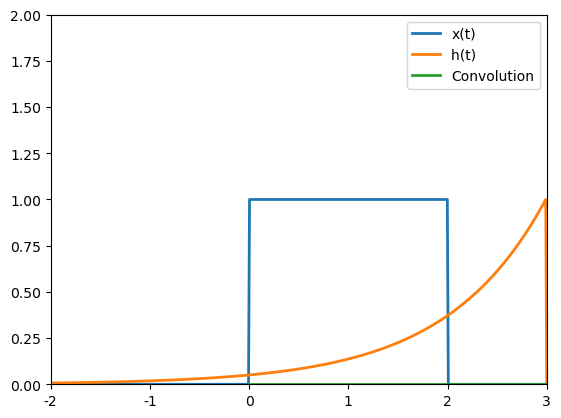

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


# 使用默认字体 DejaVu Sans
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
# 定义信号 x(t) 和 h(t)
def x(t):
    return np.heaviside(t, 1) - np.heaviside(t - 2, 1)  # 矩形脉冲信号

def h(t):
    return np.exp(-t) * np.heaviside(t, 1)  # 指数衰减信号

# 设置时间轴
t = np.linspace(-2, 3, 500)

# 翻转 h(t) 用于卷积操作
def flipped_h(t):
    return h(-t)

# 计算卷积
conv_result = np.convolve(x(t), h(t), mode='full')
conv_time = np.linspace(0, 10, len(conv_result))

# 创建绘图
fig, ax = plt.subplots()
ax.set_xlim(-2, 3)
ax.set_ylim(0, 2)

line1, = ax.plot([], [], lw=2, label='x(t)')
line2, = ax.plot([], [], lw=2, label='h(t) ')
conv_line, = ax.plot([], [], lw=2, label='Convolution')

ax.legend()

# 初始化函数，用于清空之前的绘图内容
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    conv_line.set_data([], [])
    return line1, line2, conv_line

# 动画函数，每次更新帧
def animate(i):
    # 让 h(t) 翻转并随时间滑动
    shifted_h = flipped_h(t - i * 0.01)
    
    # 更新 x(t), h(t - τ), 和卷积的显示
    line1.set_data(t, x(t))  
    line2.set_data(t, shifted_h)  
    conv_line.set_data(conv_time[:i], conv_result[:i])
    
    return line1, line2, conv_line

# 创建动画
ani = animation.FuncAnimation(fig, animate, frames=300, init_func=init, blit=True)
# 保存gif
ani.save('./figs/convolution_animation.gif', writer='pillow', fps=10)


In [ ]:
# pip install opencv-python -i https://pypi.tuna.tsinghua.edu.cn/simple

## 2-不同功能的卷积核

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# 读取图像
image_path = './figs/women.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # 读取为灰度图像

# 定义卷积核
# 边缘检测卷积核 (Sobel 核)
edge_kernel = np.array([[-1, -1, -1],
                        [-1,  8, -1],
                        [-1, -1, -1]])

# 锐化卷积核
sharpen_kernel = np.array([[ 0, -1,  0],
                           [-1,  5, -1],
                           [ 0, -1,  0]])

# 模糊卷积核 (均值模糊)
blur_kernel = np.ones((3, 3), np.float32) / 9.0

# 对图像进行卷积处理
edge_detected = cv2.filter2D(image, -1, edge_kernel)
sharpened = cv2.filter2D(image, -1, sharpen_kernel)
blurred = cv2.filter2D(image, -1, blur_kernel)

# 显示原图和处理后的图像
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

axes[0].imshow(image, cmap='gray')
axes[0].set_title('orange')
axes[0].axis('off')

axes[1].imshow(edge_detected, cmap='gray')
axes[1].set_title('edge')
axes[1].axis('off')

axes[2].imshow(sharpened, cmap='gray')
axes[2].set_title('Sharpen')
axes[2].axis('off')

axes[3].imshow(blurred, cmap='gray')
axes[3].set_title('Blur')
axes[3].axis('off')

plt.savefig('./figs/women-binerry.png')
plt.show()


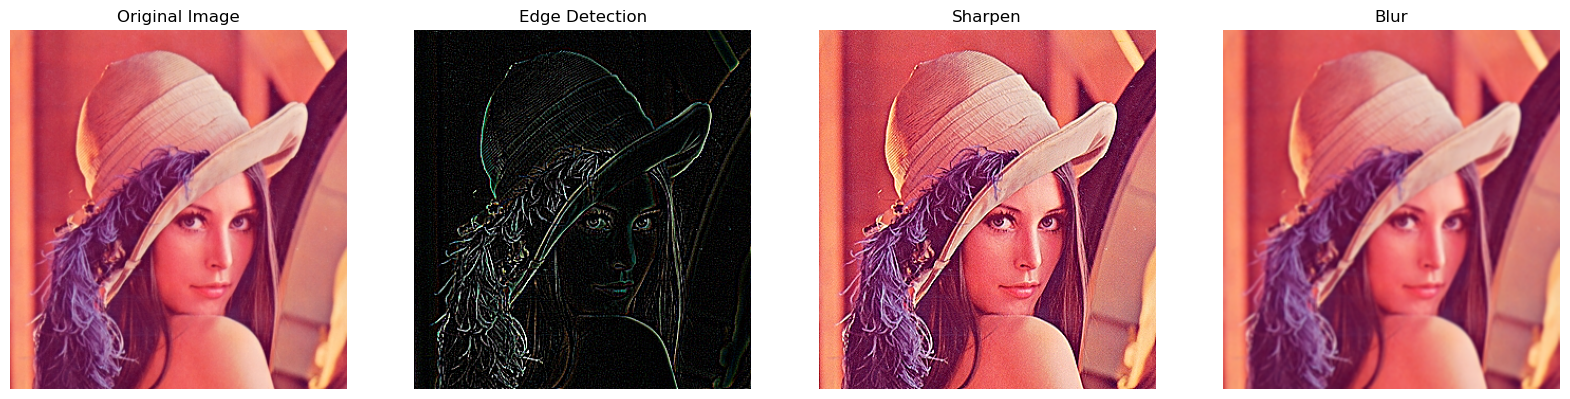

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取彩图
image_path = './figs/women.png'
image = cv2.imread(image_path, cv2.IMREAD_COLOR)  # 读取为彩图

# 将 BGR 转换为 RGB，因为 matplotlib 以 RGB 格式显示
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 定义卷积核
# 边缘检测卷积核 (Sobel 核)
edge_kernel = np.array([[-1, -1, -1],
                        [-1,  8, -1],
                        [-1, -1, -1]])

# 锐化卷积核
sharpen_kernel = np.array([[ 0, -1,  0],
                           [-1,  5, -1],
                           [ 0, -1,  0]])

# 模糊卷积核 (均值模糊)
blur_kernel = np.ones((3, 3), np.float32) / 9.0

# 对图像进行卷积处理
edge_detected = cv2.filter2D(image_rgb, -1, edge_kernel)
sharpened = cv2.filter2D(image_rgb, -1, sharpen_kernel)
blurred = cv2.filter2D(image_rgb, -1, blur_kernel)

# 显示原图和处理后的图像
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

axes[0].imshow(image_rgb)   # 显示原图
axes[0].set_title('Original Image') # 设置标题
axes[0].axis('off') # 关闭坐标轴

axes[1].imshow(edge_detected)
axes[1].set_title('Edge Detection')
axes[1].axis('off')

axes[2].imshow(sharpened)
axes[2].set_title('Sharpen')
axes[2].axis('off')

axes[3].imshow(blurred)
axes[3].set_title('Blur')
axes[3].axis('off')

plt.savefig('./figs/women-colorful.png')
plt.show()


## 3-步幅与填充


nn的卷积参数
```py
conv_layer = nn.Conv2d(
    in_channels=3,        # 输入通道数（RGB 彩色图像）
    out_channels=16,      # 输出通道数（16 个卷积核）
    kernel_size=3,        # 卷积核大小为 3x3
    stride=1,             # 步幅为 1
    padding=1,            # 四周填充 1 个像素，使输出尺寸与输入相同
    dilation=1,           # 扩展系数为 1，标准卷积
    groups=1,             # 标准卷积，未分组
    bias=True,            # 添加偏置
    padding_mode='zeros'  # 使用 0 进行填充
)
```

In [11]:
import torch
import torch.nn as nn

x = torch.rand(1,1,32,32)
# layer = nn.Conv2d(
#     in_channels=1,        # 输入通道数
#     out_channels=1,       # 输出通道数
#     kernel_size=5,        # 卷积核大小为 3x3
#     stride=1,             # 步幅为 1
#     padding=0             # 不进行填充
# )
layer = nn.Conv2d(1,1,5,1,0)
y = layer.forward(x)
y.shape

torch.Size([1, 3, 28, 28])

### 课堂练习，尝试计算出1*3*512*512图片卷积变为1*3*32*32